In [42]:
from sympy import *
from mpl_toolkits.mplot3d import  axes3d,Axes3D
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib nbagg
from scipy.spatial import ConvexHull
init_printing(use_latex=true)

t1,t2,t3,d1,l2,l3 = symbols('\\theta_1, \\theta_2, \\theta_3, d_1, l_2, l_3')
x,y,z = symbols('x,y,z')

def dhs(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

T3_0 = dhs(0,pi/2,0,t1)*dhs(l2,0,0,t2)*dhs(l3,0,0,t3)
xx = simplify(T3_0[0,3])
yy = simplify(T3_0[1,3])
zz = simplify(T3_0[2,3])

In [80]:
from numpy import sin,cos,tan,pi

l1,l2,l3 = 1,1,1
X,Y,Z = [],[],[]
for t1 in np.linspace(0,pi/2,20):
    for t2 in np.linspace(0,pi/2,20):
        for t3 in np.linspace(0,pi/2,10):
            x = (l2*cos(t2) + l3*cos(t2+t3))*cos(t1)
            y = (l2*cos(t2) + l3*cos(t2+t3))*sin(t1)
            z = l2*sin(t2) + l3*sin(t2+t3)
            X.append(x)
            Y.append(y) 
            Z.append(z)

V = np.array([X,Y,Z]).transpose()

<IPython.core.display.Javascript object>


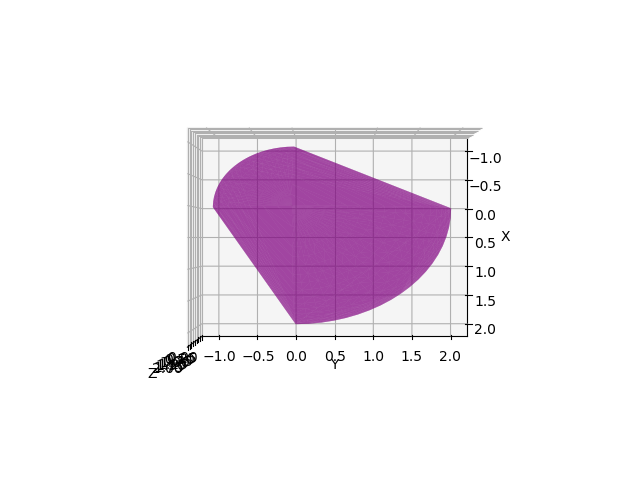

Text(0.5,0,'Z')

In [81]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#V = np.random.rand(100,3)

#ax.plot(V[:,0], V[:,1], V[:,2], 'o')

hull = ConvexHull(V)
for simplex in hull.simplices:
    simplex = np.append(simplex, [simplex[0]])
    ax.plot_trisurf(V[simplex, 0], V[simplex, 1], V[simplex, 2], color="#FF00FF77")

ax.view_init(90,0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

<IPython.core.display.Javascript object>


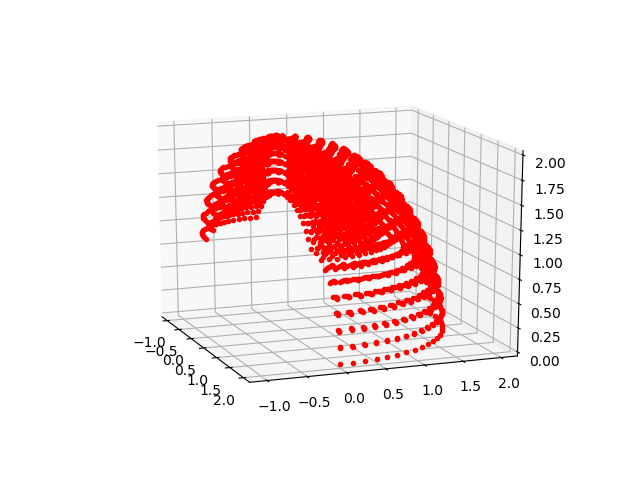

In [82]:
figA = plt.figure()
axA = figA.gca(projection='3d')
axA.plot(X,Y,Z,'r.')